<a href="https://colab.research.google.com/github/yashvsrathore/Mudra_Roopaantaran/blob/master/imageClassifier_Dog_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
! kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [16]:
train_data=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)
test_data=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_data=train_data.map(process)
test_data=test_data.map(process)

In [34]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
results=model.fit(train_data,epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.4067 - accuracy: 0.5975 - val_loss: 0.6419 - val_accuracy: 0.6246
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5782 - accuracy: 0.6981 - val_loss: 0.5332 - val_accuracy: 0.7282
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5118 - accuracy: 0.7520 - val_loss: 0.5311 - val_accuracy: 0.7442
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4889 - accuracy: 0.7736 - val_loss: 0.5323 - val_accuracy: 0.7330
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3934 - accuracy: 0.8217 - val_loss: 0.4897 - val_accuracy: 0.8024
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3267 - accuracy: 0.8585 - val_loss: 0.6058 - val_accuracy: 0.7304
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2414 - accuracy: 0.8993 - val_loss: 0.6083 - val_ac

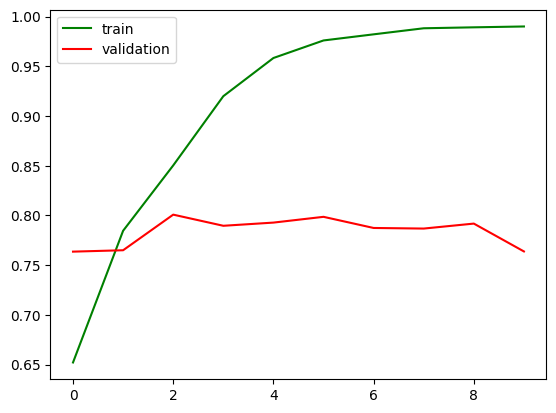

In [29]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'],color='green',label='train')
plt.plot(results.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

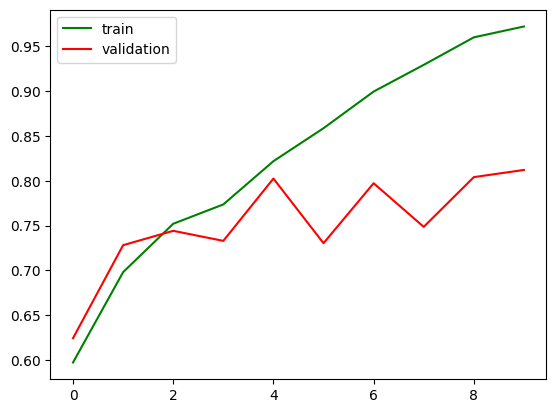

In [37]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'],color='green',label='train')
plt.plot(results.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

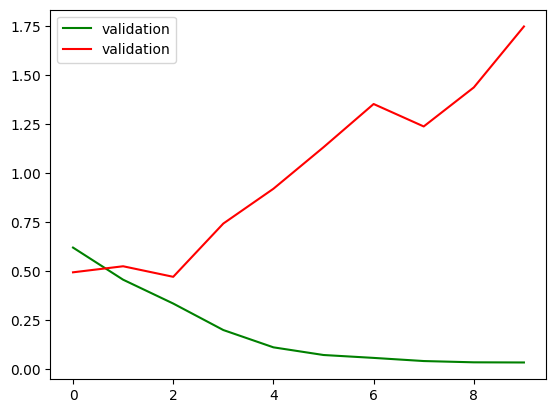

In [32]:
plt.plot(results.history['loss'],color='green',label='validation')
plt.plot(results.history['val_loss'],color='red',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

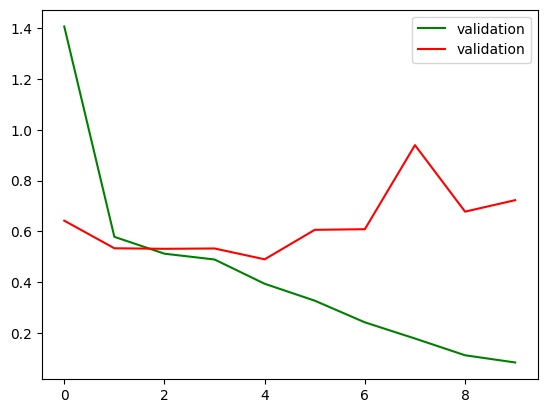

In [38]:
plt.plot(results.history['loss'],color='green',label='validation')
plt.plot(results.history['val_loss'],color='red',label='validation')
plt.legend()
plt.show